In [6]:
#import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [56]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [116]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [118]:
#split and encode dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)
#one hot encode lables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [133]:
# Build NN model
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
   Dense(16, activation='relu', input_dim=12),
   Dense(10,activation='softmax')
 ]);

classifier.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 16)                208       
                                                                 
 dense_67 (Dense)            (None, 10)                170       
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compile model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

classifier.compile(optimizer = Adam(learning_rate=0.01), loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [135]:
history=classifier.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
162/162 - 1s - loss: 1.9595 - accuracy: 0.4100 - val_loss: 1.2643 - val_accuracy: 0.4563 - 822ms/epoch - 5ms/step
Epoch 2/100
162/162 - 0s - loss: 1.3363 - accuracy: 0.4619 - val_loss: 1.2710 - val_accuracy: 0.5004 - 292ms/epoch - 2ms/step
Epoch 3/100
162/162 - 0s - loss: 1.2950 - accuracy: 0.4828 - val_loss: 1.4023 - val_accuracy: 0.4308 - 269ms/epoch - 2ms/step
Epoch 4/100
162/162 - 0s - loss: 1.3088 - accuracy: 0.4733 - val_loss: 1.3464 - val_accuracy: 0.3766 - 268ms/epoch - 2ms/step
Epoch 5/100
162/162 - 0s - loss: 1.2596 - accuracy: 0.4899 - val_loss: 1.3091 - val_accuracy: 0.4741 - 281ms/epoch - 2ms/step
Epoch 6/100
162/162 - 0s - loss: 1.2289 - accuracy: 0.4911 - val_loss: 1.1862 - val_accuracy: 0.5019 - 248ms/epoch - 2ms/step
Epoch 7/100
162/162 - 0s - loss: 1.2205 - accuracy: 0.4950 - val_loss: 1.1665 - val_accuracy: 0.5089 - 252ms/epoch - 2ms/step
Epoch 8/100
162/162 - 0s - loss: 1.2040 - accuracy: 0.4992 - val_loss: 1.2000 - val_accuracy: 0.4903 - 264ms/epoch - 2

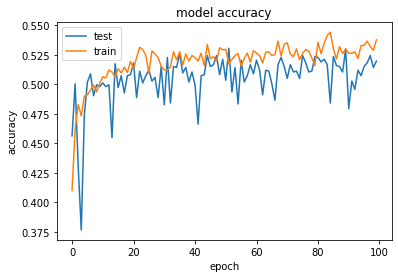

In [136]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

In [ ]:
# Get confusion matrix for randoly slected test sets

# 
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split data into train/test sets with randomization
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)


y_pred = classifier.predict(x_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
y_test = np.array(y_test)
total = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_pred)):
  total=total+1
  if (y_test[i] == 1 and y_pred[i] == 1): tp=tp+1
  elif (y_test[i] == 0 and y_pred[i] == 0): tn=tn+1
  elif (y_test[i] == 0 and y_pred[i] == 1): fp=fp+1
  elif (y_test[i] == 1 and y_pred[i] == 0): fn=fn+1
  else: print("E")

print("Total " + str(total))
print("Accuracy " + str((tp+tn)/total))
print("TN: ",tn/total)
print("TP: ",tp/total)
print("FN: ",fn/total)
print("FP: ",fp/total)

Total 131
Accuracy 0.8473282442748091
TN:  0.5648854961832062
TP:  0.2824427480916031
FN:  0.05343511450381679
FP:  0.09923664122137404
